## Project: Campaign Analytics

**Business Case:** A well established e-commerce organization wants to run campaigns across different prioritized product categories.

**Approach:** In order to predict success of the campaigns, we will need to look at some historical campaign data. By which, we can help client in making appropriate decision in their investments.

**Data required:** I have considered three datasets for my analysis fro open source sites mentioned in reference section

*   Historical campaign data
*   US States and codes
*   Social determination of health

# Global parameters

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

# Import data

In [ ]:
# Import dataset from Google Drive
# change dir to your project folder

#'''
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/Imarticus_Learning/Capstone_Project/Project1/Dataset/'
#'''
root_path_local = '/Users/sunny/OneDrive/Study/Imarticus Learning/New/Capstone_Project/Dataset/'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_ks_raw = pd.read_csv(root_path+'Kickstarter_projects_Feb19.csv')
data_geo_raw = pd.read_csv(root_path+'US_State_Cities_DB/uscities.csv')
data_sd_raw = pd.read_excel(root_path+'SDOH/county_2018.XLSX')

# Data Copy

In [ ]:
data_ks = data_ks_raw.copy(deep=True)
data_geo = data_geo_raw.copy(deep=True)
data_sd = data_sd_raw.copy(deep=True)

# Data Exploration

##Function

In [ ]:
# Def for dataframe details
class def_data():
    def __init__(self, df):
      self.df_info = df.info()
      self.df_desc_num = df.describe().transpose()
      self.df_desc_obj = df.describe(include='object').transpose()
      self.df_null = df.isnull().sum()
      self.df_total = df.isnull().sum().sort_values(ascending = False)          
      self.df_percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False) 
    def print_desc_num(self):
      print('*'*50,'Describe Numeric','*'*50)
      print(self.df_desc_num)
    def print_desc_obj(self):
      print('*'*50,'Describe Objects','*'*50)
      print(self.df_desc_obj)
    def print_null(self):
      print('*'*50,'Missing values','*'*50)
      print(self.df_percent)

# df_desc = def_data(data_ks)
# df_desc.print_desc_num()
# df_desc.print_desc_obj()
# df_desc.print_null()

## Dataset - Kickstarter

In [ ]:
data_ks.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


In [ ]:
df_desc = def_data(data_ks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192548 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             192548 non-null  int64  
 1   name           192548 non-null  object 
 2   currency       192548 non-null  object 
 3   main_category  192548 non-null  object 
 4   sub_category   192548 non-null  object 
 5   launched_at    192548 non-null  object 
 6   deadline       192548 non-null  object 
 7   duration       192548 non-null  float64
 8   goal_usd       192548 non-null  float64
 9   city           192548 non-null  object 
 10  state          192548 non-null  object 
 11  country        192548 non-null  object 
 12  blurb_length   192548 non-null  int64  
 13  name_length    192548 non-null  int64  
 14  status         192548 non-null  object 
 15  start_month    192548 non-null  int64  
 16  end_month      192548 non-null  int64  
 17  start_Q        192548 non-nul

In [ ]:
df_desc.print_desc_num()

************************************************** Describe Numeric **************************************************
                 count          mean           std      min           25%  \
id            192548.0  1.072709e+09  6.194810e+08  8624.00  5.348591e+08   
duration      192548.0  3.236291e+01  1.161034e+01     1.00  3.000000e+01   
goal_usd      192548.0  3.704990e+04  1.036236e+06     0.01  1.500000e+03   
blurb_length  192548.0  1.893832e+01  4.976948e+00     1.00  1.600000e+01   
name_length   192548.0  5.767897e+00  2.705431e+00     1.00  4.000000e+00   
start_month   192548.0  6.512168e+00  3.324410e+00     1.00  4.000000e+00   
end_month     192548.0  6.789845e+00  3.357369e+00     1.00  4.000000e+00   
usd_pledged   192548.0  1.371166e+04  9.078806e+04     0.00  1.490000e+02   

                       50%           75%           max  
id            1.074643e+09  1.607955e+09  2.147476e+09  
duration      3.000000e+01  3.400000e+01  9.300000e+01  
goal_usd      5.

In [ ]:
df_desc.print_desc_obj()

************************************************** Describe Objects **************************************************
                count  unique                        top    freq
name           192548  167953  A Midsummer Night's Dream       7
currency       192548      14                        USD  137845
main_category  192548      15                      music   25850
sub_category   192548     159                        Web    4330
launched_at    192548  168336        2018-11-12 15:06:08       4
deadline       192548  157953        2018-07-04 03:59:00      57
city           192548   12334                Los Angeles    8961
state          192548    1123                         CA   25131
country        192548      22                         US  137845
status         192548       2                 successful  117307
start_Q        192548       4                         Q3   51120
end_Q          192548       4                         Q4   51647


In [ ]:
df_desc.print_null()

************************************************** Missing values **************************************************
usd_pledged      0.0
end_Q            0.0
name             0.0
currency         0.0
main_category    0.0
sub_category     0.0
launched_at      0.0
deadline         0.0
duration         0.0
goal_usd         0.0
city             0.0
state            0.0
country          0.0
blurb_length     0.0
name_length      0.0
status           0.0
start_month      0.0
end_month        0.0
start_Q          0.0
id               0.0
dtype: float64


In [ ]:
data_ks.shape

(192548, 20)

In [ ]:
data_ks = data_ks[data_ks.country == 'US']

In [ ]:
data_ks.shape

(137845, 20)

In [ ]:
data_ks["launched_at"] = data_ks["launched_at"].str.split(" ", n = 1, expand=True)
data_ks["deadline"] = data_ks["deadline"].str.split(" ", n = 1, expand=True)

In [ ]:
data_ks['launched_at'] = pd.to_datetime(data_ks['launched_at'])
data_ks['deadline'] = pd.to_datetime(data_ks['deadline'])

In [ ]:
data_ks["launched_day"] = data_ks['launched_at'].dt.day_name()
data_ks["launched_month"] = data_ks['launched_at'].dt.month_name()

In [ ]:
data_ks.head(2)

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,launched_day,launched_month
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30,2018-11-15,16.0,2000.0,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.0,Tuesday,October
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09,2017-07-09,30.0,1100.0,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.0,Friday,June


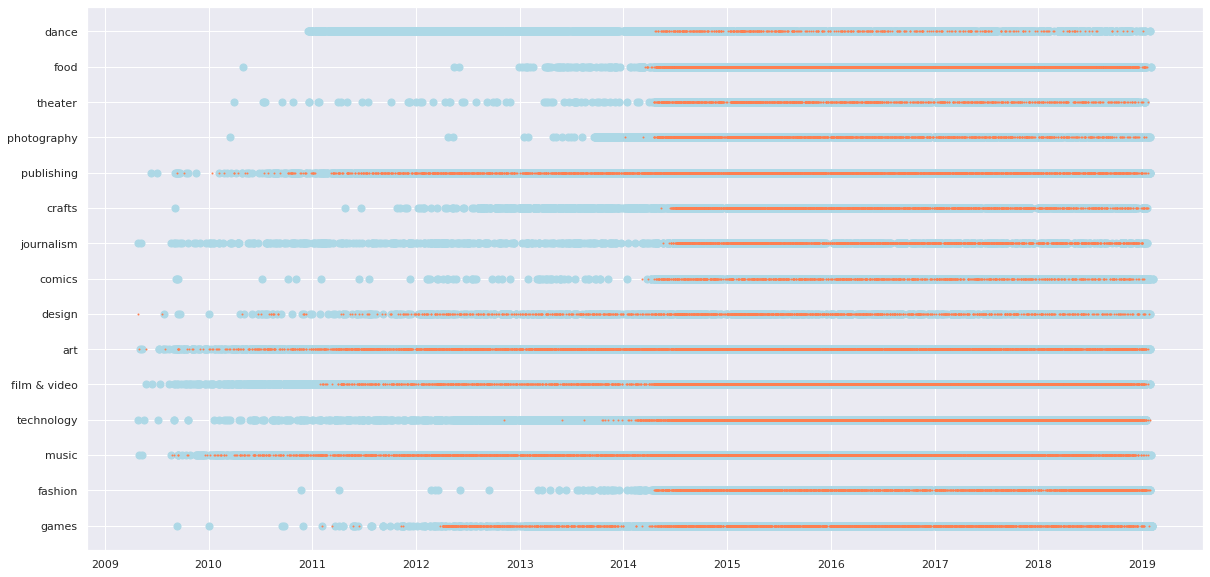

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
data_temp = data_ks.query('status == "successful"')
plt.scatter(data_temp['launched_at'],data_temp['main_category'],s=50, c='lightblue')
data_temp = data_ks.query('status != "successful"')
plt.scatter(data_temp['launched_at'],data_temp['main_category'],s=1, c='coral')

In [ ]:
# Drop columns
columns = ['id','currency','launched_at','deadline','city','country','start_month','end_month','start_Q','end_Q']
data_ks.drop(columns, axis=1, inplace=True)

In [ ]:
data_ks.head(2)

,name,main_category,sub_category,duration,goal_usd,state,blurb_length,name_length,status,usd_pledged,launched_day,launched_month
0,Socks of Speed and Socks of Elvenkind,games,Tabletop Games,16.0,2000.0,WI,14,7,successful,6061.0,Tuesday,October
2,"Live Printing with SX8: ""Squeegee Pulp Up""",fashion,Apparel,30.0,1100.0,NY,21,7,successful,1110.0,Friday,June


In [ ]:
def FEATURES_Values(df_data, var):
    print('*'*100)
    print ('Unique values:::::\n', len(df_data[var].unique()))
    print('Value counts:::::\n', df_data[var].value_counts())
FEATURES_Values(data_ks,'main_category')

****************************************************************************************************
Unique values:::::
 15
Value counts:::::
 music           21249
film & video    18557
art             14373
publishing      14171
technology      12186
food            11601
games            7903
fashion          6624
comics           6055
crafts           4772
design           4715
photography      4634
theater          3994
journalism       3722
dance            3289
Name: main_category, dtype: int64


In [ ]:
FEATURES_Values(data_ks,'name_length')

****************************************************************************************************
Unique values:::::
 20
Value counts:::::
 4     17826
5     17048
3     16747
6     15832
7     15513
8     14402
9     11869
2     10843
10     7517
1      4890
11     3620
12     1272
13      346
14       82
15       20
16       12
17        3
21        1
20        1
27        1
Name: name_length, dtype: int64


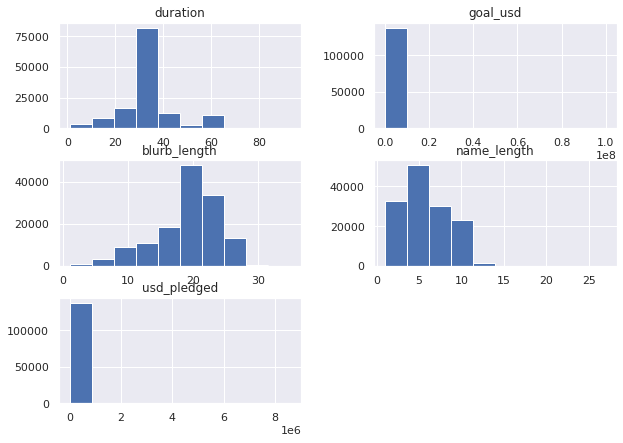

In [ ]:
fig = data_ks.hist(figsize = (10,7))

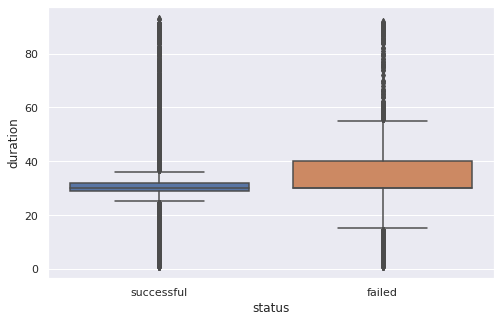

In [ ]:
import seaborn as sns
sns.boxplot(data=data_ks,x='status',y='duration')

## Dataset- Geo

In [ ]:
# Keep Columns
#data_geo = data_geo_raw.copy(deep = True)
data_geo = data_geo[['state_name','state_id']]

In [ ]:
data_geo.shape

(28338, 2)

In [ ]:
data_geo.sort_values("state_id", inplace = True)

In [ ]:
data_geo.head()

,state_name,state_id
25713,Alaska,AK
19100,Alaska,AK
27854,Alaska,AK
26304,Alaska,AK
26349,Alaska,AK


In [ ]:
data_geo.drop_duplicates(subset='state_id',keep='first',inplace=True)

In [ ]:
data_geo.reset_index(drop=True, inplace=True)

In [ ]:
data_geo.shape

(52, 2)

In [ ]:
data_geo.rename(columns = {"state_name": "STATE"}, inplace=True)

In [ ]:
data_geo.head()

,STATE,state_id
0,Alaska,AK
1,Alabama,AL
2,Arkansas,AR
3,Arizona,AZ
4,California,CA


## Dataset SDOH

In [ ]:
data_sd.sort_values("STATE", inplace = True)

In [ ]:
data_sd.head(2)

,STATE,REGION,COUNTY,FIPSCODE,YEAR,AHRF_USDA_RUCC_2013,NCHS_URCS_2006,NCHS_URCS_2013,TERRITORY,ACS_TOTAL_POP_WT,ACS_PCT_AGE_65UP,ACS_PCT_AGE_0_17,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_18_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_80UP,ACS_MEDIAN_AGE,ACS_PCT_FEMALE,ACS_PCT_WHITE,ACS_PCT_BLACK,ACS_PCT_AIAN,ACS_PCT_ASIAN,ACS_PCT_NHPI,ACS_PCT_MULT_RACE,ACS_PCT_HISPAN,ACS_PCT_VA,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_1990,ACS_PCT_LIMIT_ENGLISH,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGLISH,ACS_PCT_SPANISH,ACS_PCT_OTH_EURP,ACS_PCT_API_LANG,ACS_PCT_OTH_LANG,ACS_PCT_FOREIGN_BORN,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_2010,ACS_PCT_DISABLE,ACS_PCT_VA_DISABLE,ACS_PCT_NONVA_DISABLE,ACS_PCT_GRP_QRT,ACS_PCT_UNEMPLOY,ACS_PCT_VA_UNEMPL,ACS_PCT_VA_LABOR_FORCE,ACS_PCT_NATURE,ACS_PCT_CONSTRUCT,ACS_PCT_MANUFACT,ACS_PCT_WHOLESALE,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_INFORM,ACS_PCT_FINANCE,ACS_PCT_PROFESS,ACS_PCT_EDUC,ACS_PCT_ART,ACS_PCT_OTHER,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_MEDIAN_HH_INCOME,ACS_VA_MEDIAN_INCOME,ACS_NONVA_MEDIAN_INCOME,ACS_PER_CAPITA_INCOME,ACS_GINI_INDEX,ACS_PCT_PERSON_INC99,ACS_PCT_PERSON_INC124,ACS_PCT_INC137,ACS_PCT_PERSON_INC199,ACS_PCT_PERSON_INC200,ACS_PCT_INC400,ACS_PCT_VA_POOR,ACS_PCT_NONVA_POOR,ACS_PCT_FOOD_STAMP,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_DIVORCE_SEPARAT,ACS_PCT_1FAM_HH_FOOD_STMP,ACS_PCT_CHILD_1FAM,ACS_PCT_1UP_PERS_1ROOM,ACS_PCT_NO_VEH,ACS_PCT_MOBILE_HOME,ACS_PCT_10UNITS,ACS_TOTAL_HOUSEHOLD,ACS_MEDIAN_RENT,ACS_MEDIAN_HOME_VALUE,ACS_PCT_RENT_COST_30PCT,ACS_PCT_RENTED_HH,ACS_PCT_VACANT_HH,ACS_HH_SIZE,ACS_PCT_HH_1PERS,ACS_PCT_OWNED_HH,ACS_PCT_OWNER_HH_CHILD,ACS_PCT_RENTER_HH_CHILD,ACS_PCT_CHILD_DISAB,ACS_PCT_GRANDKID_TOT,ACS_PCT_GRANDP_RESPS,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_RENTER_65UP,ACS_PCT_HH_NO_FUEL,ACS_PCT_INTERNET,ACS_PCT_NO_PC,ACS_PCT_SMARTPHONE,ACS_PCT_BROADBAND,ACS_PCT_DRIVE_2WORK,ACS_PCT_PUBL_TRANSIT,ACS_PCT_WALK_2WORK,ACS_PCT_TAXICAB_2WORK,ACS_PCT_COMMT_15MIN,ACS_PCT_COMMT_29MIN,ACS_PCT_COMMT_59MIN,ACS_PCT_COMMT_60MINUP,ACS_PCT_PUB_COMMT_15MIN,ACS_PCT_PUB_COMMT_29MIN,ACS_PCT_PUB_COMMT_59MIN,ACS_PCT_PUB_COMMT_60MINUP,ACS_PCT_WORK_NO_CAR,ACS_PCT_MEDICAID_ANY,ACS_PCT_MEDICARE_ONLY,ACS_PCT_PRIVATE_ANY,ACS_PCT_UNINSURED,ACS_PCT_PRIVATE_EMPL,ACS_PCT_PRIVATE_SELF,ACS_PCT_PRIVATE_2,ACS_PCT_PRIVATE_OTHER,ACS_PCT_PRIVATE_MDCR,ACS_PCT_TRICARE_VA,ACS_PCT_PUBLIC_OTHER,ACS_PCT_OTHER_INS,ACS_PCT_PUBLIC_ONLY,ACS_PCT_MEDICAID_ANY64,ACS_PCT_PRIVATE_ANY64,ACS_PCT_UNINSURED64,ACS_PCT_PRIVATE_EMPL64,ACS_PCT_PRIVATE_SELF64,ACS_PCT_TRICARE_VA64,ACS_PCT_LT_HS,ACS_PCT_HS_GRADUATE,ACS_PCT_ASSOCIATE_DGR,ACS_PCT_BACHELOR_DGR,ACS_PCT_GRADUATE_DGR,ACS_PCT_POSTHS_ED,ACS_PCT_VA_COLLEGE,ACS_PCT_VA_BACHELOR,ACS_PCT_SELF_MDCR,ACS_PCT_1UP_OWNER_1ROOM,ACS_PCT_1UP_RENT_1ROOM,AHRF_COMM_HLTH_CNTR,AHRF_TXC_SITE_CNTRL,AHRF_TXC_SITE_NO_CNTRL,AHRF_PHYSICIAN_ASSIST,AHRF_NURSE_PRACT,AHRF_RURAL_H_CLINIC,AHRF_MENTL_HLTH_CNT,AHRF_FED_HLTH_CNT,AHRF_DAYS_AIR_QLT,AHRF_PCT_GOOD_AQ,AHRF_HPSA_DENTIST,AHRF_HPSA_MENTAL,AHRF_HPSA_PRIM,CHR_MENTAL_DR_RATE,CHR_MENTAL_DR_NUM,CHR_ALCOHOL_DRIV_DEATH,CHR_TEEN_BIRTH,CHR_DENTIST_RATE,CHR_DENTISTS_NUM,CHR_POP_DENOMINATOR,CHR_PREMAT_DEATH_RATE,CHR_DRUG_OVERDOSE_DEATH,CHR_SEGREG_BLACK,CHR_SEGREG_NON_WHITE,CHR_HOMICIDES,CHR_FIREARM_DEATH,CCBP_RATE_FF_PER_1000,CCBP_RATE_CS_PER_1000,CCBP_RATE_SFS_PER_1000,CCBP_RATE_SOGS_PER_1000,CCBP_RATE_FSR_PER_1000,CCBP_RATE_CFHEORS_PER_1000,CCBP_RATE_CFS_PER_1000,CCBP_RATE_FCRSC_PER_1000,CCBP_RATE_BWLSTORES_PER_1000,CCBP_RATE_CHS_PER_1000,CCBP_RATE_GAMBLING_PER_1000,CCBP_RATE_SHELTERS_PER_1000,AMFAR_HIVDIAGNOSED,AMFAR_DISTSSP,AMFAR_AMATFAC,AMFAR_MEDAMATFAC,AMFAR_MHFAC,AMFAR_MEDMHFAC,AMFAR_HICVTFAC,AMFAR_MEDHICVTFAC,AMFAR_HCVTFAC,AMFAR_MEDHCVTFAC,AMFAR_HIVTFAC,AMFAR_MEDHIVTFAC,MP_ELIGIBLES,MP_ENROLLED,MP_PERCPEN,NHC_NUMFACS,NHC_BEDCOUNT,NHC_DAILY_RES,NHC_LIC_STAFF,CDC_OPIOID_DEATH,CDC_HEART_DISEASE_DEATH,NEPHTN_MONAAAC_

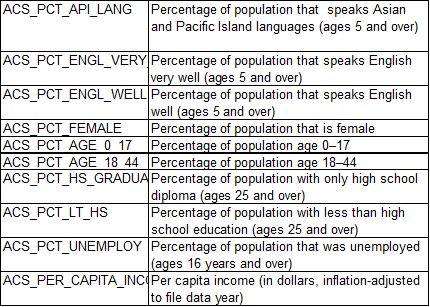

In [ ]:
! pip install sqldf

In [ ]:
import sqldf

In [ ]:
query = """
            SELECT
              STATE,
              AVG(ACS_PCT_API_LANG) as PCT_ASIANPACF,
              AVG(ACS_PCT_ENGLISH+ACS_PCT_ENGL_VERY_WELL+ACS_PCT_ENGL_WELL) as PCT_ENG,
              AVG(ACS_PCT_FEMALE) as PCT_FEMALE,
              AVG(ACS_PCT_AGE_0_17+ACS_PCT_AGE_18_44) as PCT_LE_45,
              AVG(ACS_PCT_HS_GRADUATE+ACS_PCT_LT_HS) as PCT_LE_HS,
              AVG(ACS_PCT_UNEMPLOY) as PCT_UNEMPLOYED,
              AVG(ACS_PER_CAPITA_INCOME) as PER_CAPITA_INCOME
            FROM
            data_sd
            group by STATE
            order by STATE;
        """
data_sd_summary = sqldf.run(query)

In [ ]:
data_sd_summary.head()

,STATE,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME
0,Alabama,0.490403,99.183388,51.285627,55.300955,53.640731,4.072239,23072.835821
1,Alaska,5.787655,98.213448,46.562000,59.999310,44.791414,6.145103,32531.206897
2,Arizona,0.934000,95.333400,49.544133,55.886267,44.219067,4.312000,23459.400000
3,Arkansas,0.494427,98.934147,50.585453,54.367227,54.904627,3.397107,22442.733333
4,California,4.739103,93.346966,49.416966,56.876966,39.111086,4.191517,32089.620690


## Merge datasets

In [ ]:
data_sd_summary.shape

(54, 8)

In [ ]:
data_geo.shape

(52, 2)

In [ ]:
data_sd_geo = data_sd_summary.merge(data_geo, how='left', on='STATE')

In [ ]:
data_sd_geo.shape

(54, 9)

In [ ]:
data_sd_geo[data_sd_geo.state_id.isnull()]

,STATE,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,state_id
8,Dist. of Columbia,1.966,97.505,52.537,66.678,26.567,5.124,53321.0,NaN
11,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,US Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_sd_geo = data_sd_geo[data_sd_geo.state_id.notnull()]

In [ ]:
data_sd_geo.shape

(51, 9)

In [ ]:
data_ks.head(2)

,name,main_category,sub_category,duration,goal_usd,state,blurb_length,name_length,status,usd_pledged,launched_day,launched_month
0,Socks of Speed and Socks of Elvenkind,games,Tabletop Games,16.0,2000.0,WI,14,7,successful,6061.0,Tuesday,October
2,"Live Printing with SX8: ""Squeegee Pulp Up""",fashion,Apparel,30.0,1100.0,NY,21,7,successful,1110.0,Friday,June


In [ ]:
data_sd_geo.head(2)

,STATE,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,state_id
0,Alabama,0.490403,99.183388,51.285627,55.300955,53.640731,4.072239,23072.835821,AL
1,Alaska,5.787655,98.213448,46.562000,59.999310,44.791414,6.145103,32531.206897,AK


In [ ]:
data_all = data_ks.merge(data_sd_geo, how='inner', left_on='state', right_on='state_id')

In [ ]:
data_all.shape

(131196, 21)

In [ ]:
data_all.head(2)

,name,main_category,sub_category,duration,goal_usd,state,blurb_length,name_length,status,usd_pledged,launched_day,launched_month,STATE,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,state_id
0,Socks of Speed and Socks of Elvenkind,games,Tabletop Games,16.0,2000.0,WI,14,7,successful,6061.0,Tuesday,October,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI
1,Technique Playing Cards Signature Edition,games,Playing Cards,30.0,5000.0,WI,10,5,successful,7984.0,Friday,October,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI


In [ ]:
data_all_actual = data_all.copy(deep = True)

In [ ]:
data_all_actual.shape

(131196, 21)

# Feature selection

## Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_all['main_category']= label_encoder.fit_transform(data_all['main_category'])
data_all['sub_category']= label_encoder.fit_transform(data_all['sub_category'])
data_all['status']= label_encoder.fit_transform(data_all['status'])
data_all['launched_day']= label_encoder.fit_transform(data_all['launched_day'])
data_all['launched_month']= label_encoder.fit_transform(data_all['launched_month'])

In [ ]:
data_all.head(2)

,name,main_category,sub_category,duration,goal_usd,state,blurb_length,name_length,status,usd_pledged,launched_day,launched_month,STATE,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,state_id
0,Socks of Speed and Socks of Elvenkind,8,136,16.0,2000.0,WI,14,7,1,6061.0,5,10,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI
1,Technique Playing Cards Signature Edition,8,106,30.0,5000.0,WI,10,5,1,7984.0,0,10,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI


In [ ]:
columns = ['state', 'STATE', 'state_id']
data_all.drop(columns, axis=1, inplace=True)

In [ ]:
data_all.head(2)

,name,main_category,sub_category,duration,goal_usd,blurb_length,name_length,status,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME
0,Socks of Speed and Socks of Elvenkind,8,136,16.0,2000.0,14,7,1,6061.0,5,10,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25
1,Technique Playing Cards Signature Edition,8,106,30.0,5000.0,10,5,1,7984.0,0,10,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25


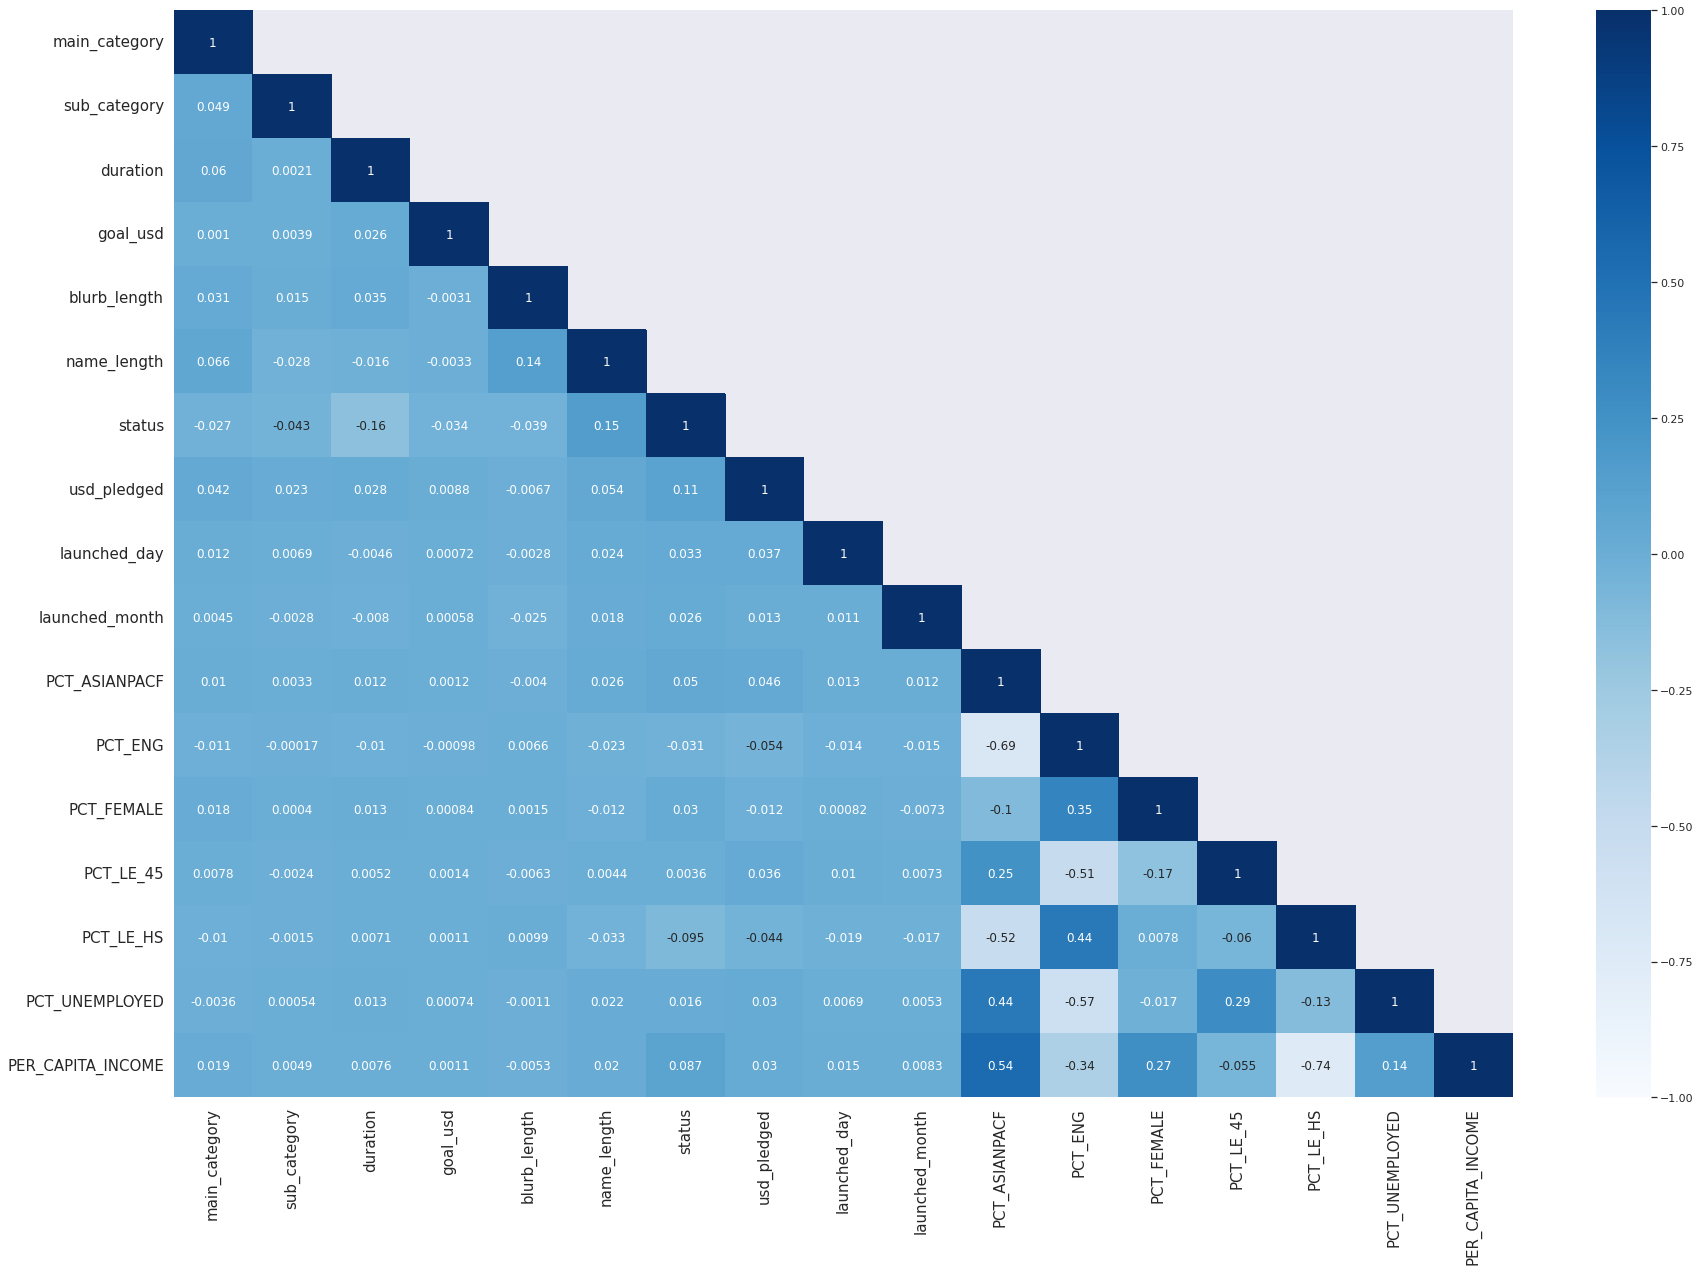

In [ ]:
corrmat = data_all.corr()
plt.figure(figsize = (30,20))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Standardization of data

In [ ]:
XY = data_all.copy(deep = True)
Y_var = ['status']
Y = XY[Y_var]
Drop_X = ['name','status']
X = XY.copy(deep = True)
X.drop(Drop_X, axis=1, inplace=True)

In [ ]:
Y.head(2)

,status
0,1
1,1


In [ ]:
# reset index and drop old index
Y.reset_index(inplace = True, drop = True)

In [ ]:
X.head(2)

,main_category,sub_category,duration,goal_usd,blurb_length,name_length,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME
0,8,136,16.0,2000.0,14,7,6061.0,5,10,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25
1,8,106,30.0,5000.0,10,5,7984.0,0,10,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25


In [ ]:
X.reset_index(inplace = True, drop = True)

In [ ]:
print(len(X.columns))

16


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X)       
features = scale.transform(X)   
features_scaled = pd.DataFrame(features, columns=X.columns[:16])

In [ ]:
features_scaled.head(2)

,main_category,sub_category,duration,goal_usd,blurb_length,name_length,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME
0,0.154337,1.282200,-1.403899,-0.033875,-0.998032,0.462982,-0.083530,0.827006,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594
1,0.154337,0.622695,-0.196901,-0.030956,-1.796107,-0.283199,-0.063349,-1.490338,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594


In [ ]:
data_scaled = pd.concat([features_scaled, Y], axis=1)
data_scaled.head(2)

,main_category,sub_category,duration,goal_usd,blurb_length,name_length,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,status
0,0.154337,1.282200,-1.403899,-0.033875,-0.998032,0.462982,-0.083530,0.827006,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1
1,0.154337,0.622695,-0.196901,-0.030956,-1.796107,-0.283199,-0.063349,-1.490338,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1


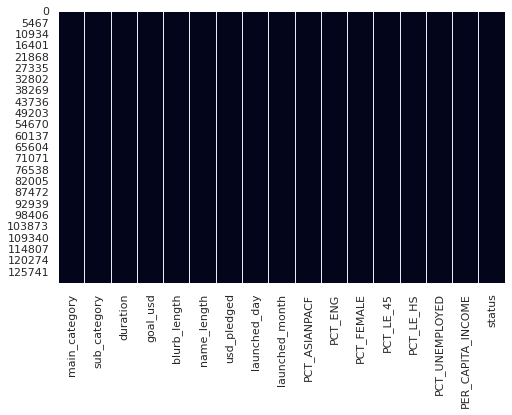

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.heatmap(data_scaled.isnull(), cbar=False)
plt.show()

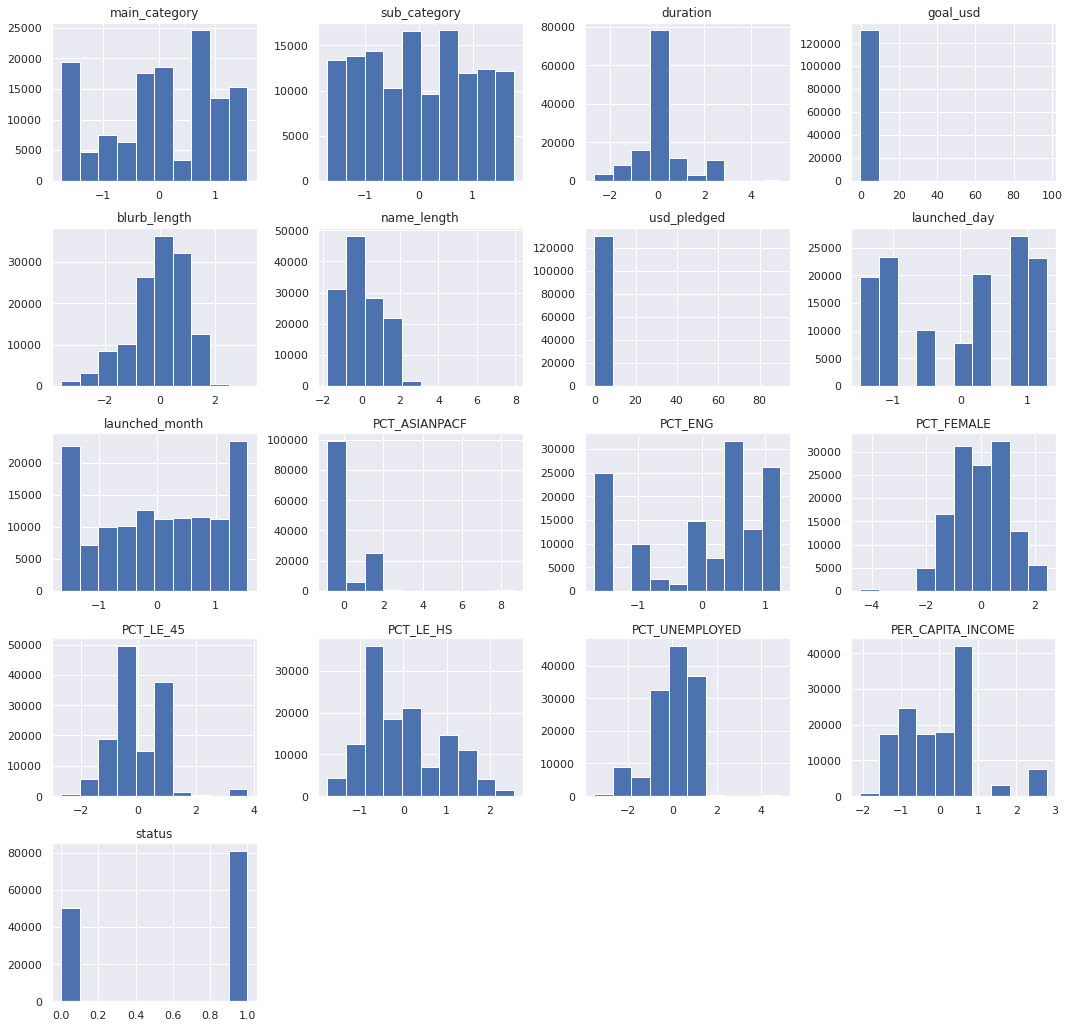

In [ ]:
fig = data_scaled.hist(figsize = (18,18))

## Feature selecetion using RF

In [ ]:
Y_var = ['status']
Y = data_scaled[Y_var]
X = data_scaled.copy(deep = True)
X.drop(Y_var, axis=1, inplace=True)

In [ ]:
print(Y.head(2))
print("-"*100)
print(X.head(2))

   status
0       1
1       1
----------------------------------------------------------------------------------------------------
   main_category  sub_category  duration  goal_usd  blurb_length  name_length  \
0       0.154337      1.282200 -1.403899 -0.033875     -0.998032     0.462982   
1       0.154337      0.622695 -0.196901 -0.030956     -1.796107    -0.283199   

   usd_pledged  launched_day  launched_month  PCT_ASIANPACF   PCT_ENG  \
0    -0.083530      0.827006        1.253139      -0.559907  1.035254   
1    -0.063349     -1.490338        1.253139      -0.559907  1.035254   

   PCT_FEMALE  PCT_LE_45  PCT_LE_HS  PCT_UNEMPLOYED  PER_CAPITA_INCOME  
0   -0.370657  -1.284254   0.014593       -2.011103           0.080594  
1   -0.370657  -1.284254   0.014593       -2.011103           0.080594  


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
df_columns = X.columns
df_columns

Index(['main_category', 'sub_category', 'duration', 'goal_usd', 'blurb_length',
       'name_length', 'usd_pledged', 'launched_day', 'launched_month',
       'PCT_ASIANPACF', 'PCT_ENG', 'PCT_FEMALE', 'PCT_LE_45', 'PCT_LE_HS',
       'PCT_UNEMPLOYED', 'PER_CAPITA_INCOME'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=20, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
for feature in zip(df_columns, clf.feature_importances_):
    print(feature)

('main_category', 0.011662123553819665)
('sub_category', 0.015970494032283532)
('duration', 0.015509335865460548)
('goal_usd', 0.20248911845853115)
('blurb_length', 0.007432928750907655)
('name_length', 0.011513360921039325)
('usd_pledged', 0.701151650663899)
('launched_day', 0.004557359535612131)
('launched_month', 0.005632679801554079)
('PCT_ASIANPACF', 0.003951515762950716)
('PCT_ENG', 0.0026039980090631974)
('PCT_FEMALE', 0.002712498395039591)
('PCT_LE_45', 0.002372659106633905)
('PCT_LE_HS', 0.003941113716252805)
('PCT_UNEMPLOYED', 0.0026424191764772647)
('PER_CAPITA_INCOME', 0.005856744250475546)


In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 20))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20, n_jobs=None,
                                                 oob_score=False,


In [ ]:
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat),"Variables found significant:")
print(selected_feat)

2 Variables found significant:
Index(['goal_usd', 'usd_pledged'], dtype='object')


**Corelation matrix**

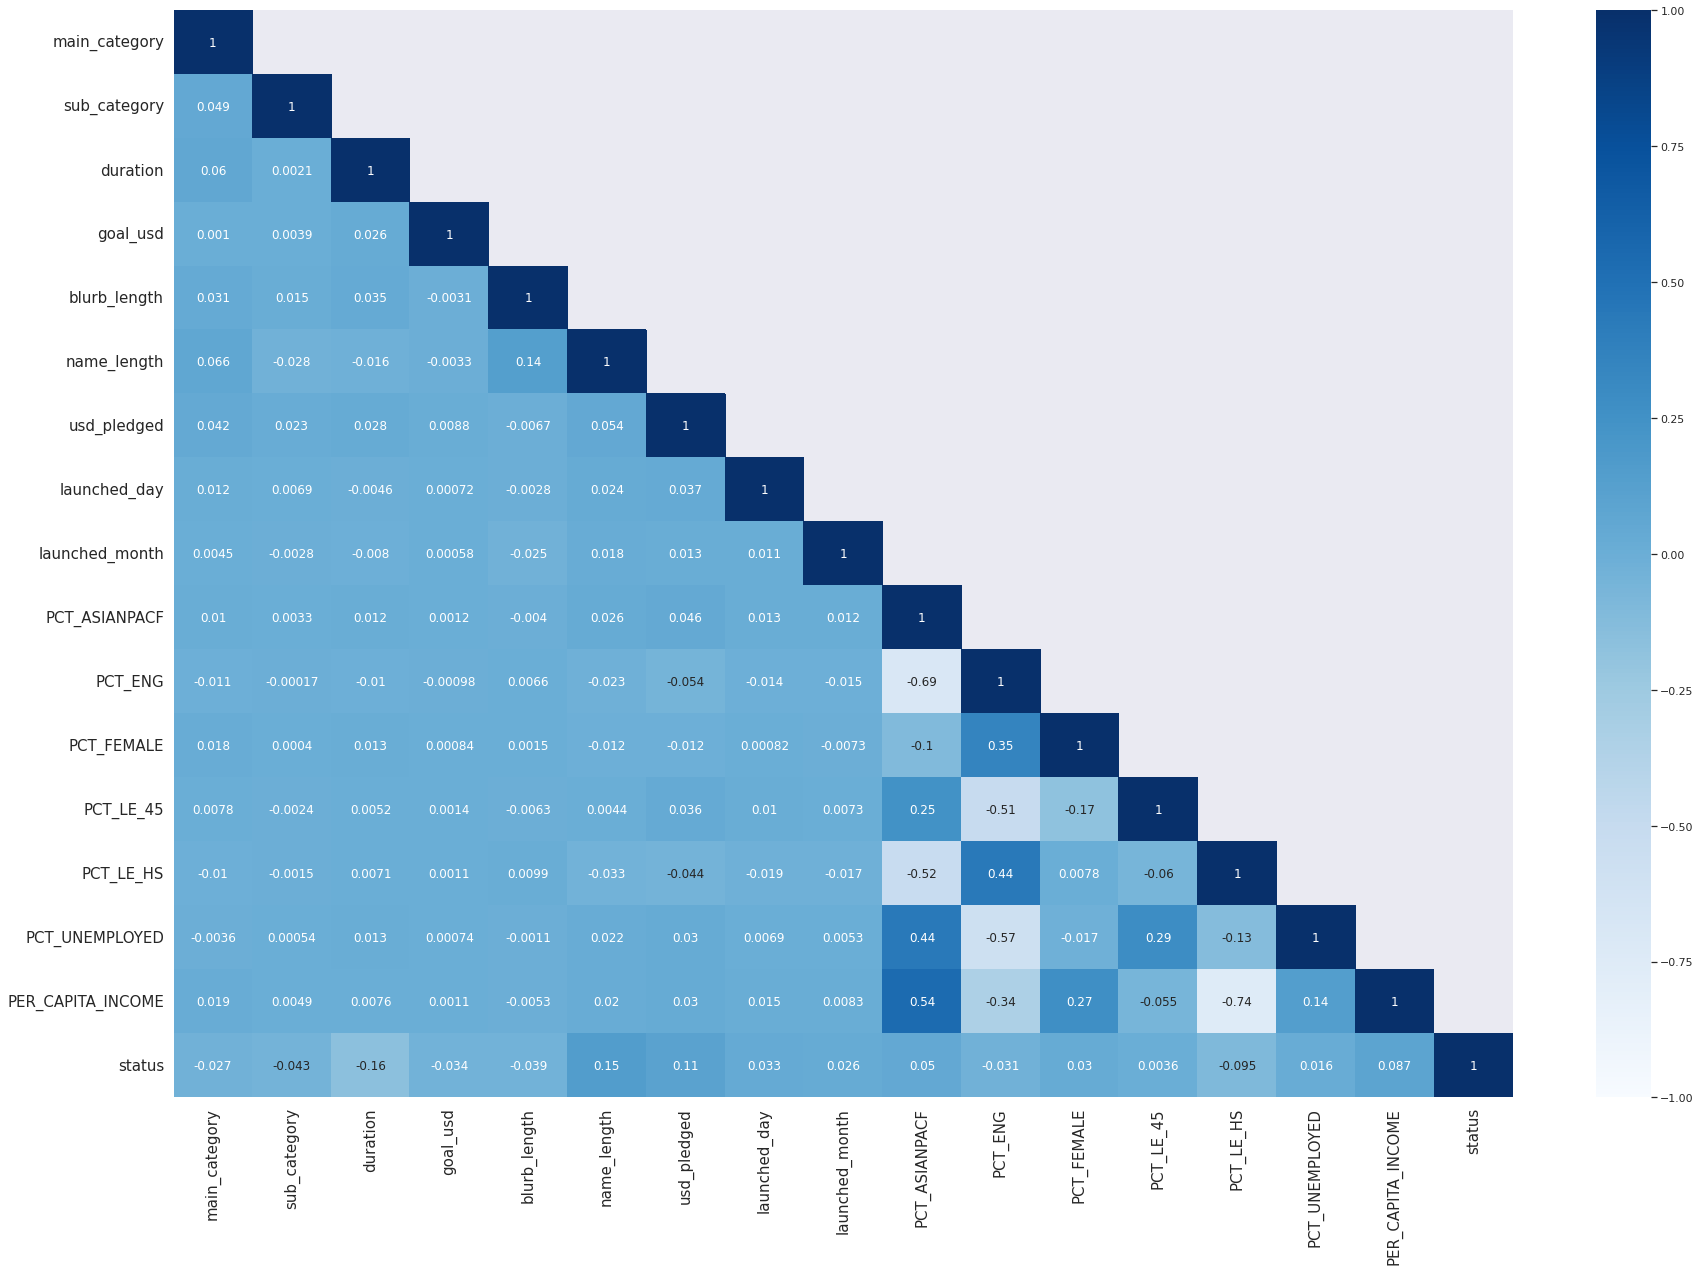

In [ ]:
corrmat = data_scaled.corr()
plt.figure(figsize = (30,20))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# Model development

In [ ]:
data_scaled.head()

,main_category,sub_category,duration,goal_usd,blurb_length,name_length,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,status
0,0.154337,1.282200,-1.403899,-0.033875,-0.998032,0.462982,-0.083530,0.827006,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1
1,0.154337,0.622695,-0.196901,-0.030956,-1.796107,-0.283199,-0.063349,-1.490338,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1
2,0.629982,-1.048049,2.389524,-0.029982,0.997156,-0.656290,-0.043948,0.827006,-0.194586,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1
3,1.105626,-1.289867,0.406598,-0.034702,-0.199957,0.462982,-0.132496,-0.563400,-0.194586,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1
4,-0.083485,-0.586396,-0.369329,-0.024143,1.196675,-0.283199,-0.004203,-1.026869,-0.484131,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1


## Results Tabulate

In [ ]:
cols = ['Model','Accuracy Score','F1-score','ROC AUC Score','Precision Score','Recall Score']
results_tab = pd.DataFrame(columns = cols)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

class classification_defs():

  def __init__(self, model):
      self.model = model

  def conf_matrix(self):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.show()
    TN = cm[0,0]        # True Negatives are denoted by 'TN'
    TP = cm[1,1]         # True Positives are denoted by 'TP'
    FN = cm[1,0]        # False Negatives are denoted by 'FN'
    FP = cm[0,1]         # False Positives are denoted by 'FP'
    result = classification_report(y_test,y_pred)
    

  def ROC_AUC(self):
    plt.rcParams['figure.figsize']=(8,5)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr,tpr)                # plot the ROC curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.grid(True)

  def tablulate_results(self):
    cols = ['Model','Accuracy Score','F1-score','ROC AUC Score','Precision Score','Recall Score']
    result_tabulation = pd.DataFrame(columns = cols)
    results = pd.Series({
                    'Model': self.model,
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'F1-score':metrics.f1_score(y_test, y_pred),
                    'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                    'Precision Score': metrics.precision_score(y_test, y_pred),
                    'Recall Score': metrics.recall_score(y_test, y_pred)
                    })
    result_tabulation = result_tabulation.append(results , ignore_index = True)
    return result_tabulation


## Logistic Regression

In [ ]:
data_scaled.head(2)

,main_category,sub_category,duration,goal_usd,blurb_length,name_length,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,status
0,0.154337,1.282200,-1.403899,-0.033875,-0.998032,0.462982,-0.083530,0.827006,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1
1,0.154337,0.622695,-0.196901,-0.030956,-1.796107,-0.283199,-0.063349,-1.490338,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1


In [ ]:
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. 
# Hence, you need to use the command 'add_constant' so that it also fits an intercept.

import statsmodels.api as sm
data_scaled = sm.add_constant(data_scaled)

In [ ]:
data_scaled.head(2)

,const,main_category,sub_category,duration,goal_usd,blurb_length,name_length,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,status
0,1.0,0.154337,1.282200,-1.403899,-0.033875,-0.998032,0.462982,-0.083530,0.827006,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1
1,1.0,0.154337,0.622695,-0.196901,-0.030956,-1.796107,-0.283199,-0.063349,-1.490338,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1


In [ ]:
import statsmodels
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
Y_var = ['status']
X = data_scaled.drop(Y_var, axis = 1)
Y = data_scaled[Y_var]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit1 = LogisticRegression(random_state = 0)
logit1.fit(X_train, y_train)
y_pred = logit1.predict(X_test)

In [ ]:
Model_Obj = classification_defs('Logistic Regression             ')

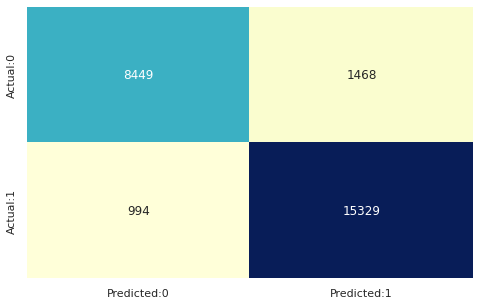

In [ ]:
Model_Obj.conf_matrix()

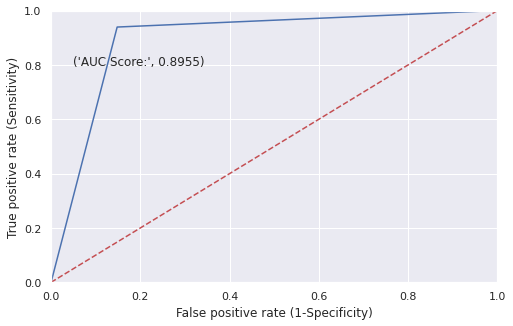

In [ ]:
Model_Obj.ROC_AUC()

In [ ]:
results_tab = results_tab.append(Model_Obj.tablulate_results() , ignore_index = True)
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,0.906174,0.925664,0.895538,0.912603,0.939104


## Decision Tree

### Entropy

In [ ]:
from sklearn import tree
clf_ent = tree.DecisionTreeClassifier(criterion="entropy")
clf_ent_train = clf_ent.fit(X_train, y_train)
y_pred = clf_ent_train.predict(X_test)

In [ ]:
Model_Obj = classification_defs('DecisionTree Entropy')

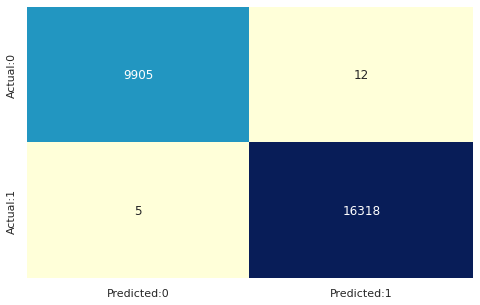

In [ ]:
Model_Obj.conf_matrix()

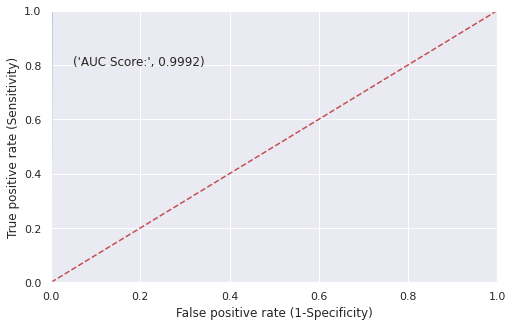

In [ ]:
Model_Obj.ROC_AUC()

In [ ]:
results_tab = results_tab.append(Model_Obj.tablulate_results() , ignore_index = True)
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,0.906174,0.925664,0.895538,0.912603,0.939104
1,DecisionTree Entropy,0.999352,0.999479,0.999242,0.999265,0.999694


### Gini

In [ ]:
from sklearn import tree
#clf_gini = tree.DecisionTreeClassifier()
clf_gini = tree.DecisionTreeClassifier(criterion="gini")
clf_gini_train = clf_gini.fit(X_train, y_train)
y_pred = clf_gini_train.predict(X_test)

In [ ]:
Model_Obj = classification_defs('DecisionTree Gini')

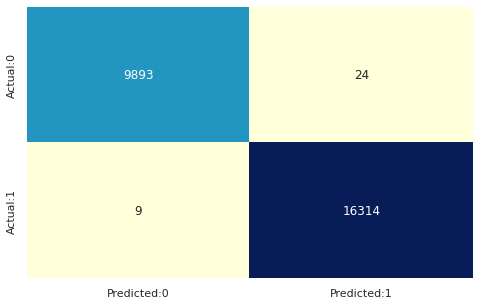

In [ ]:
Model_Obj.conf_matrix()

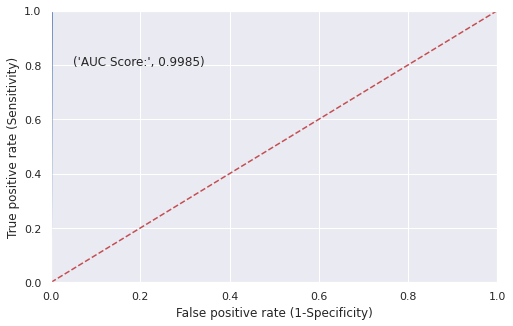

In [ ]:
Model_Obj.ROC_AUC()

In [ ]:
results_tab = results_tab.append(Model_Obj.tablulate_results() , ignore_index = True)
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,0.906174,0.925664,0.895538,0.912603,0.939104
1,DecisionTree Entropy,0.999352,0.999479,0.999242,0.999265,0.999694
2,DecisionTree Gini,0.998742,0.998990,0.998514,0.998531,0.999449


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
'''
num_trees = 150
max_features = 5
RandomModel = RandomForestClassifier(n_estimators = num_trees, max_features = max_features, random_state=0, n_jobs=-1)
'''
RandomModel = RandomForestClassifier(random_state=0, n_jobs=-1)
RandomModel = RandomModel.fit(X_train,y_train)
y_pred = RandomModel.predict (X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(len(RandomModel.estimators_))

Accuracy: 0.9964939024390244
[[ 9834    83]
 [    9 16314]]
100


In [ ]:
Model_Obj = classification_defs('Random Forest             ')

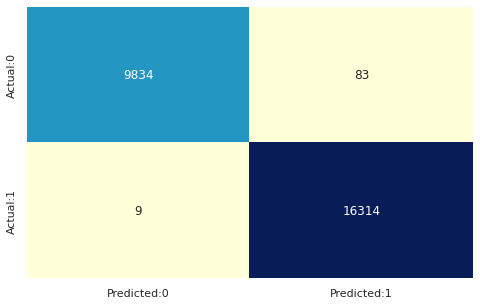

In [ ]:
Model_Obj.conf_matrix()

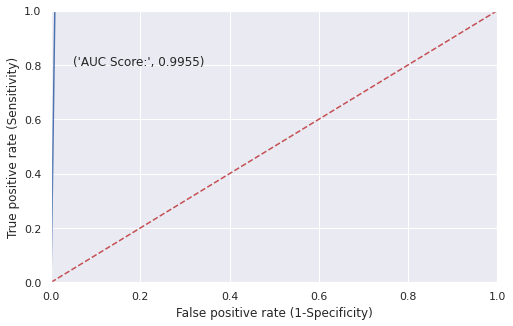

In [ ]:
Model_Obj.ROC_AUC()

In [ ]:
results_tab = results_tab.append(Model_Obj.tablulate_results() , ignore_index = True)
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,0.906174,0.925664,0.895538,0.912603,0.939104
1,DecisionTree Entropy,0.999352,0.999479,0.999242,0.999265,0.999694
2,DecisionTree Gini,0.998742,0.998990,0.998514,0.998531,0.999449
3,Random Forest,0.996494,0.997188,0.995540,0.994938,0.999449


## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

In [ ]:
Model_Obj = classification_defs('Adaboost')

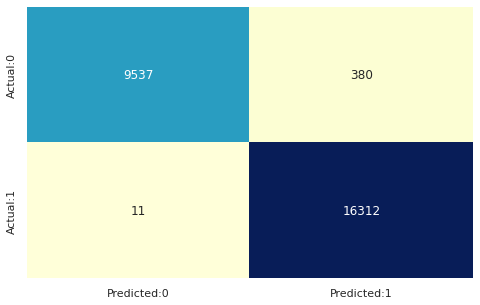

In [ ]:
Model_Obj.conf_matrix()

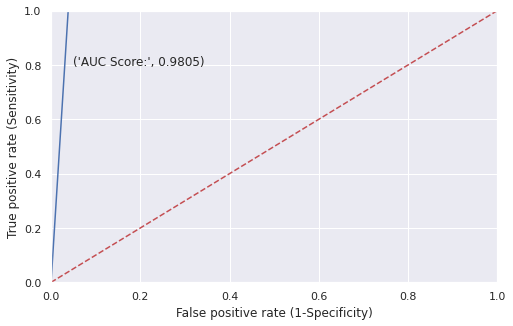

In [ ]:
Model_Obj.ROC_AUC()

In [ ]:
results_tab = results_tab.append(Model_Obj.tablulate_results() , ignore_index = True)
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,0.906174,0.925664,0.895538,0.912603,0.939104
1,DecisionTree Entropy,0.999352,0.999479,0.999242,0.999265,0.999694
2,DecisionTree Gini,0.998742,0.998990,0.998514,0.998531,0.999449
3,Random Forest,0.996494,0.997188,0.995540,0.994938,0.999449
4,Adaboost,0.985099,0.988157,0.980504,0.977235,0.999326


## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('LR' ,logit1), ('DT_E',clf_ent), ('DT_G',clf_gini), ('RT',RandomModel),('AB',adaboost)]
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [ ]:
Model_Obj = classification_defs('Ensemble Model')

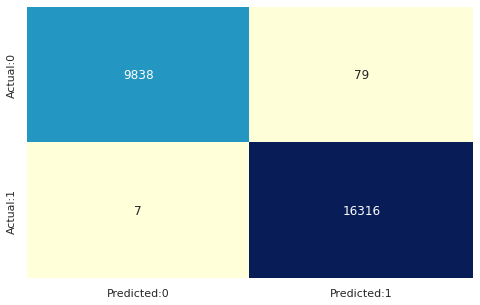

In [ ]:
Model_Obj.conf_matrix()

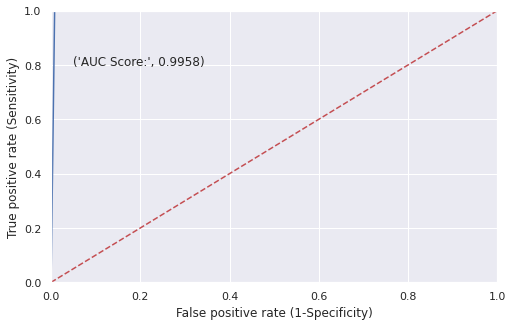

In [ ]:
Model_Obj.ROC_AUC()

In [ ]:
results_tab = results_tab.append(Model_Obj.tablulate_results() , ignore_index = True)
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,0.906174,0.925664,0.895538,0.912603,0.939104
1,DecisionTree Entropy,0.999352,0.999479,0.999242,0.999265,0.999694
2,DecisionTree Gini,0.998742,0.998990,0.998514,0.998531,0.999449
3,Random Forest,0.996494,0.997188,0.995540,0.994938,0.999449
4,Adaboost,0.985099,0.988157,0.980504,0.977235,0.999326
5,Ensemble Model,0.996723,0.997371,0.995803,0.995181,0.999571


# RESULTS

In [ ]:
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,0.906174,0.925664,0.895538,0.912603,0.939104
1,DecisionTree Entropy,0.999352,0.999479,0.999242,0.999265,0.999694
2,DecisionTree Gini,0.998742,0.998990,0.998514,0.998531,0.999449
3,Random Forest,0.996494,0.997188,0.995540,0.994938,0.999449
4,Adaboost,0.985099,0.988157,0.980504,0.977235,0.999326
5,Ensemble Model,0.996723,0.997371,0.995803,0.995181,0.999571


In [ ]:
results_tab[results_tab.select_dtypes(include=['number']).columns] *= 100
results_tab

,Model,Accuracy Score,F1-score,ROC AUC Score,Precision Score,Recall Score
0,Logistic Regression,90.617378,92.566425,89.553785,91.260344,93.910433
1,DecisionTree Entropy,99.935213,99.947937,99.924182,99.926516,99.969368
2,DecisionTree Gini,99.874238,99.898962,99.851427,99.853103,99.944863
3,Random Forest,99.649390,99.718826,99.553958,99.493810,99.944863
4,Adaboost,98.509909,98.815690,98.050403,97.723460,99.932610
5,Ensemble Model,99.672256,99.737148,99.580252,99.518146,99.957116


In [ ]:
results_tab=results_tab.set_index(['Model'])

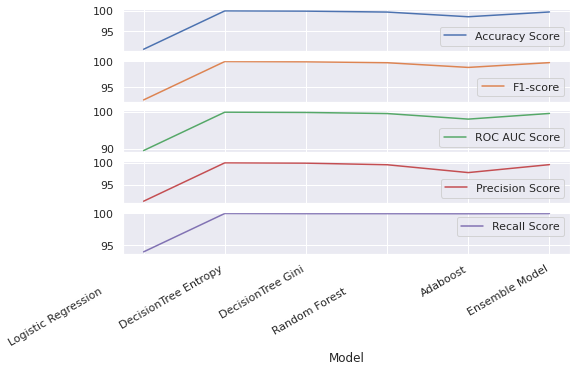

In [ ]:
results_tab.plot(subplots = True)
plt.show()

**DecisionTree Entropy has better accuracy compared to all other models**

## Analyze Results

In [ ]:
y_pred = clf_ent_train.predict(X)

In [ ]:
print(X.shape)
print(Y.shape)
print(y_pred.shape)

(131196, 17)
(131196, 1)
(131196,)


In [ ]:
print(type(X))
print(type(Y))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
Y_pred_df = pd.DataFrame(y_pred, columns = ['status_pred'])

In [ ]:
Final_DF = pd.concat([X, Y, Y_pred_df], axis=1)

In [ ]:
Final_DF.head(2)

,const,main_category,sub_category,duration,goal_usd,blurb_length,name_length,usd_pledged,launched_day,launched_month,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,status,status_pred
0,1.0,0.154337,1.282200,-1.403899,-0.033875,-0.998032,0.462982,-0.083530,0.827006,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1,1
1,1.0,0.154337,0.622695,-0.196901,-0.030956,-1.796107,-0.283199,-0.063349,-1.490338,1.253139,-0.559907,1.035254,-0.370657,-1.284254,0.014593,-2.011103,0.080594,1,1


In [ ]:
Final_DF.shape

(131196, 19)

In [ ]:
data_all_actual.head()

,name,main_category,sub_category,duration,goal_usd,state,blurb_length,name_length,status,usd_pledged,launched_day,launched_month,STATE,PCT_ASIANPACF,PCT_ENG,PCT_FEMALE,PCT_LE_45,PCT_LE_HS,PCT_UNEMPLOYED,PER_CAPITA_INCOME,state_id
0,Socks of Speed and Socks of Elvenkind,games,Tabletop Games,16.0,2000.0,WI,14,7,successful,6061.00,Tuesday,October,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI
1,Technique Playing Cards Signature Edition,games,Playing Cards,30.0,5000.0,WI,10,5,successful,7984.00,Friday,October,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI
2,Beef Tea's Debut Album,music,Country & Folk,60.0,6000.0,WI,24,4,successful,9832.75,Tuesday,July,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI
3,What I Can Do With My 'Do!,publishing,Children's Books,37.0,1150.0,WI,18,7,successful,1395.00,Saturday,July,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI
4,Sacred Blossom Living Herbal Tea,food,Farms,28.0,12000.0,WI,25,5,successful,13620.00,Monday,January,Wisconsin,0.869306,99.224306,49.552958,51.644958,44.219181,2.450444,29772.25,WI


In [ ]:
columns = ['name','main_category','sub_category']
data_main = data_all_actual[columns]
columns = ['status','status_pred']
data_sub = Final_DF[columns]

In [ ]:
data_main.shape

(131196, 3)

In [ ]:
data_sub.shape

(131196, 2)

In [ ]:
data_comb = pd.concat([data_main, data_sub], axis=1)

In [ ]:
data_comb.head()

,name,main_category,sub_category,status,status_pred
0,Socks of Speed and Socks of Elvenkind,games,Tabletop Games,1,1
1,Technique Playing Cards Signature Edition,games,Playing Cards,1,1
2,Beef Tea's Debut Album,music,Country & Folk,1,1
3,What I Can Do With My 'Do!,publishing,Children's Books,1,1
4,Sacred Blossom Living Herbal Tea,food,Farms,1,1


In [ ]:
y_test = Y

In [ ]:
Model_Obj = classification_defs('DecisionTree Entropy - Full')

In [ ]:
data_comb.head()

,name,main_category,sub_category,status,status_pred
0,Socks of Speed and Socks of Elvenkind,games,Tabletop Games,1,1
1,Technique Playing Cards Signature Edition,games,Playing Cards,1,1
2,Beef Tea's Debut Album,music,Country & Folk,1,1
3,What I Can Do With My 'Do!,publishing,Children's Books,1,1
4,Sacred Blossom Living Herbal Tea,food,Farms,1,1


In [ ]:
query = """
            	SELECT
              main_category,
              sub_category,
              case when status == status_pred then 1 else 0 end as Match
            	FROM
            	data_comb
            	order by main_category;
	"""
data_comb1 = sqldf.run(query)

In [ ]:
query = """
            	SELECT
              main_category,
              sum(case when Match == 1 then 1 else 0 end) as Pred_Y,
              sum(case when Match == 0 then 1 else 0 end) as Pred_N
            	FROM
            	data_comb1
            	group by main_category
            	order by main_category;
	"""
data_comb2 = sqldf.run(query)

In [ ]:
data_comb2['Pred_Perc'] = data_comb2['Pred_Y']*100/(data_comb2['Pred_Y']+data_comb2['Pred_N'])

In [ ]:
df_sorted = data_comb2.sort_values(by=['Pred_Perc'], ascending = False, axis = 0)

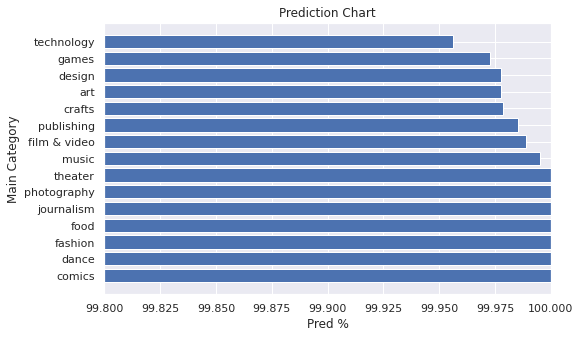

In [ ]:
plt.barh(df_sorted['main_category'], df_sorted['Pred_Perc'])
plt.title("Prediction Chart")
plt.xlabel("Pred %")
plt.ylabel("Main Category")
plt.xlim(99.8,100)
plt.show()

# References

Kickstarter Campaigns:
https://webrobots.io/kickstarter-datasets/
https://www.kaggle.com/yashkantharia/kickstarter-campaigns

Social Determinants of Health:
https://www.ahrq.gov/sdoh/data-analytics/sdoh-data.html

United States Cities Database
https://simplemaps.com/data/us-cities


